<a href="https://colab.research.google.com/github/John260260/Regression_probs/blob/main/LinearReg_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales

What are the **features**?
- TV: Advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: Advertising dollars spent on Radio
- Newspaper: Advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/datasets/Advertising.csv')

In [ ]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
del data['Unnamed: 0']

In [ ]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
data.shape

(200, 4)

In [ ]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


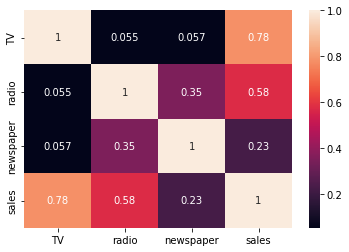

In [ ]:
sns.heatmap(data.corr(),annot=True)

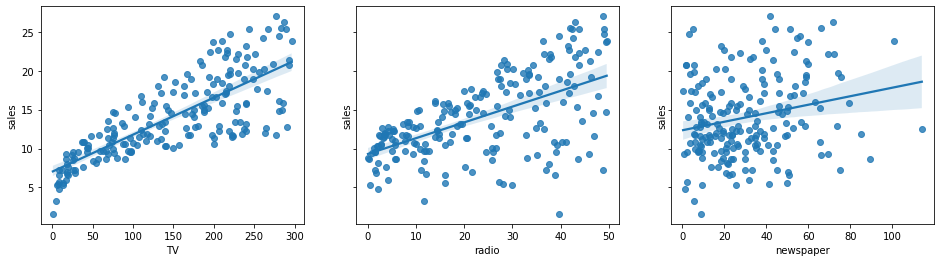

In [ ]:
# visualize the relationship between the features and the response using scatterplots
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3, sharey=True, figsize=(16,4))
sns.regplot(ax=ax1, x=data['TV'], y=data['sales'])
sns.regplot(ax=ax2, x=data['radio'], y=data['sales'])
sns.regplot(ax=ax3, x=data['newspaper'], y=data['sales'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
x=data.drop('sales',axis=1).copy()
y=data.sales

In [ ]:
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [ ]:
lm.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [ ]:
lm.intercept_

2.938889369459412

In [ ]:
lm.predict([[232.1,40.8,50]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([21.20101362])

In [ ]:
2.938889369459412+0.04576465*232.1+0.18853002*40.8+-0.00103749*50

21.20101495045941

In [ ]:
y_pred=lm.predict(x)

In [ ]:
from sklearn import metrics

In [ ]:
print('y-intercept             : ', lm.intercept_)
print('beta coefficients       : ', lm.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2 value                : ', metrics.r2_score(y, y_pred))

y-intercept             :  2.938889369459412
beta coefficients       :  [ 0.04576465  0.18853002 -0.00103749]
Mean Abs Error   MAE    :  1.252011229687068
Mean Sq  Error MSE      :  2.784126314510936
Root Mean Sq Error RMSE :  1.6685701407225697
r2 value                :  0.8972106381789522


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
y=y.values.reshape(-1,1)

In [ ]:
y_scaled=scaler.fit_transform(y)

In [ ]:
x_scaled=scaler.fit_transform(x)

In [ ]:
model2=lm.fit(x_scaled,y_scaled)

In [ ]:
preds =model2.predict(x_scaled)

In [ ]:
print('y-intercept             : ', model2.intercept_)
print('beta coefficients       : ', model2.coef_)
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_scaled,preds))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_scaled,preds))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_scaled,preds)))
print('r2 value                : ', metrics.r2_score(y_scaled,preds))

y-intercept             :  [-1.67495358e-17]
beta coefficients       :  [[ 0.75306591  0.53648155 -0.00433069]]
Mean Abs Error   MAE    :  0.24056799106621196
Mean Sq  Error MSE      :  0.10278936182104789
Root Mean Sq Error RMSE :  0.32060780062413935
r2 value                :  0.8972106381789521


In [ ]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
lm=smf.ols(formula='sales~ TV + radio + newspaper', data=data).fit()

In [ ]:
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        08:48:15   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)

In [ ]:
# only include TV and Radio in the model
lm = smf.ols(formula='sales ~ TV + radio', data=data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           4.83e-98
Time:                        08:48:15   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
np.random.seed(12345)

In [ ]:
nums=np.random.rand(len(data))
mask_large=nums>0.5

data['size']='small'
data.loc[mask_large,'size']='large'
data.head()

,TV,radio,newspaper,sales,size
0,230.1,37.8,69.2,22.1,large
1,44.5,39.3,45.1,10.4,small
2,17.2,45.9,69.3,9.3,small
3,151.5,41.3,58.5,18.5,small
4,180.8,10.8,58.4,12.9,large


In [ ]:
data['islarge']=data['size'].map({'small':0, 'large':1})
data.head(3)

,TV,radio,newspaper,sales,size,islarge
0,230.1,37.8,69.2,22.1,large,1
1,44.5,39.3,45.1,10.4,small,0
2,17.2,45.9,69.3,9.3,small,0


In [ ]:
feature_cols=['TV','radio','newspaper','islarge']
X=data[feature_cols]
y=data['sales']

In [ ]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [ ]:
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

In [ ]:
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768,  0.05742385])

In [ ]:
np.random.seed(12345)
Nums=np.random.rand(len(data))
mask_larges=Nums< 0.5

data['Size']='Small'
data.loc[mask_larges,'Size']='Large'
data.head()

,TV,radio,newspaper,sales,size,islarge,Size
0,230.1,37.8,69.2,22.1,large,1,Small
1,44.5,39.3,45.1,10.4,small,0,Large
2,17.2,45.9,69.3,9.3,small,0,Large
3,151.5,41.3,58.5,18.5,small,0,Large
4,180.8,10.8,58.4,12.9,large,1,Small


In [ ]:
data['Islarge']=data['Size'].map({'Small':0, 'Large':1})
data.head(3)

,TV,radio,newspaper,sales,size,islarge,Size,Islarge
0,230.1,37.8,69.2,22.1,large,1,Small,0
1,44.5,39.3,45.1,10.4,small,0,Large,1
2,17.2,45.9,69.3,9.3,small,0,Large,1


In [ ]:
feature_cols=['TV','radio','newspaper','Islarge']
X=data[feature_cols]
y=data['sales']

In [ ]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [ ]:
lm.coef_

array([ 0.04571982,  0.18872814, -0.00109768, -0.05742385])

In [ ]:
np.random.seed(123456)

In [ ]:
nums=np.random.rand(len(data))
mask_suburban=(nums>0.33)&(nums<0.66)
mask_urban=nums>0.66
data['Area']='rural'
data.loc[mask_suburban, 'Area']='suburban'
data.loc[mask_urban, 'Area']='urban'

In [ ]:
data.head()

,TV,radio,newspaper,sales,size,islarge,Size,Islarge,Area
0,230.1,37.8,69.2,22.1,large,1,Small,0,rural
1,44.5,39.3,45.1,10.4,small,0,Large,1,urban
2,17.2,45.9,69.3,9.3,small,0,Large,1,rural
3,151.5,41.3,58.5,18.5,small,0,Large,1,urban
4,180.8,10.8,58.4,12.9,large,1,Small,0,suburban


In [ ]:
area_dummies=pd.get_dummies(data.Area, prefix='Area',drop_first=True)

data=pd.concat([data,area_dummies],axis=1)
data.head(3)

,TV,radio,newspaper,sales,size,islarge,Size,Islarge,Area,Area_suburban,Area_urban
0,230.1,37.8,69.2,22.1,large,1,Small,0,rural,0,0
1,44.5,39.3,45.1,10.4,small,0,Large,1,urban,0,1
2,17.2,45.9,69.3,9.3,small,0,Large,1,rural,0,0


In [ ]:
feature_cols= ['TV', 'radio', 'newspaper', 'islarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

In [ ]:
lm = LinearRegression()
lm.fit(X, y)


LinearRegression()

In [ ]:
print(feature_cols)
print(lm.coef_)

['TV', 'radio', 'newspaper', 'islarge', 'Area_suburban', 'Area_urban']
[ 0.04574401  0.1878667  -0.0010877   0.07739661 -0.10656299  0.26813802]


# Chi

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hsg=pd.read_csv('/content/drive/MyDrive/datasets/Housing_data.csv')

In [ ]:
hsg.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


In [ ]:
hsg.shape

(1047, 7)

In [ ]:
hsg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047 entries, 0 to 1046
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       1047 non-null   int64  
 1   LivingArea  1047 non-null   int64  
 2   Bathrooms   1047 non-null   float64
 3   Bedrooms    1047 non-null   int64  
 4   LotSize     1047 non-null   float64
 5   Age         1047 non-null   int64  
 6   Fireplace   1047 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 57.4 KB


In [ ]:
lv=hsg['LivingArea']
Price=hsg['Price']

Text(0, 0.5, 'Price')

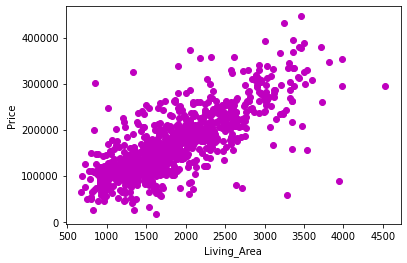

In [ ]:
plt.scatter(lv,Price,c='m')
plt.xlabel('Living_Area')
plt.ylabel('Price')

In [ ]:
corr_coef=hsg.corr()

In [ ]:
corr_coef

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
LivingArea,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
LotSize,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


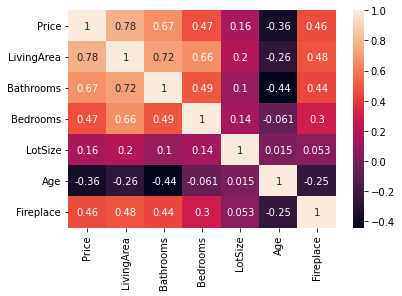

In [ ]:
sns.heatmap(data=corr_coef, annot=True)

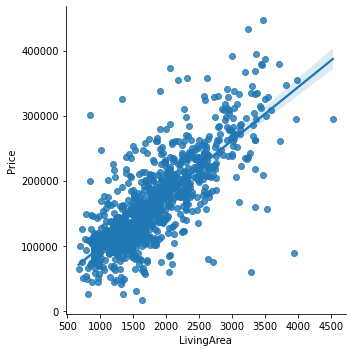

In [ ]:
sns.lmplot(x='LivingArea',y='Price',data=hsg)

In [ ]:
from sklearn import linear_model

In [ ]:
regression_model=linear_model.LinearRegression()

In [ ]:
regression_model.fit(X=hsg[['LivingArea']],y=hsg['Price'])

LinearRegression()

In [ ]:
regression_model.intercept_

15875.636989985855

In [ ]:
regression_model.coef_

array([81.88251056])

In [ ]:
regression_model.score(X=hsg[['LivingArea']],y=hsg['Price'])

0.6027914477336614

In [ ]:
train_prediction=regression_model.predict(X=hsg[['LivingArea']])

In [ ]:
train_prediction

array([149262.24668738, 125925.73117862,  83183.06066786, ...,
       291082.75497214, 281993.79630031, 299762.30109119])

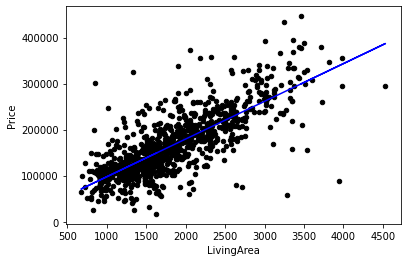

In [ ]:
hsg.plot(kind='scatter',x='LivingArea',y='Price',figsize=(6,4), color='black')
plt.plot(hsg['LivingArea'],train_prediction,color='blue')

In [ ]:
residuals=hsg['Price']-train_prediction

In [ ]:
residuals.describe()

count    1.047000e+03
mean     1.634484e-11
std      4.263705e+04
min     -2.507283e+05
25%     -2.083217e+04
50%     -1.748463e+03
75%      1.854249e+04
max      2.157009e+05
Name: Price, dtype: float64

In [ ]:
# there is difference between you want god to be there and actually believing in the already existing god


In [ ]:
SSResiduals=(residuals**2).sum()

In [ ]:
SSResiduals

1901541869645.2004

In [ ]:
SSR=((train_prediction-hsg['Price'].mean())**2).sum()

In [ ]:
SSR

2885721291723.407

In [ ]:
TSS=SSResiduals+SSR
TSS

4787263161368.607

In [ ]:
SSR/TSS

0.6027914477336613

In [ ]:
from scipy import stats

((array([-3.21080761, -2.94660583, -2.79923536, ...,  2.79923536,
          2.94660583,  3.21080761]),
  array([-250728.25862689, -225856.68416981, -163191.4755784 , ...,
          188837.15628366,  201878.1540114 ,  215700.87656822])),
 (41381.230651304744, 9.830407546770313e-12, 0.9684184189670919))

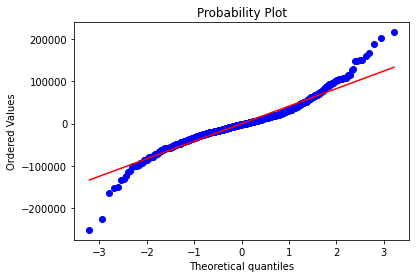

In [ ]:
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist='norm', plot=plt)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
RMSE= mean_squared_error(train_prediction,hsg['Price'])**0.5

In [ ]:
RMSE

42616.67920387508

# Sales Price

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
flatdata = pd.read_csv ('/content/drive/MyDrive/datasets/Price.csv')

In [ ]:
flatdata.head()

,Area (sqft),Price ($)
0,2000,88600
1,1600,71600
2,1980,93300
3,1840,84300
4,1710,80600


In [ ]:
x=flatdata.iloc[:,:-1].values
y=flatdata.iloc[:,1].values


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictValues=model.predict(X_test)

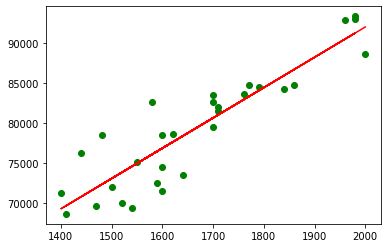

In [ ]:
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,model.predict(X_train),color='red')

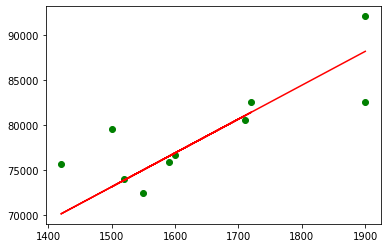

In [ ]:
plt.scatter(X_test,y_test,color='green')
plt.plot(X_test,model.predict(X_test),color='red')

# Boston Housing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
sns.set_style('whitegrid')
%matplotlib inline

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
#reset data as pandas DataFrame

boston_df=DataFrame(boston.data)

#label columns
boston_df.columns=boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df['Price']=boston.target
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


Text(0, 0.5, 'No of houses')

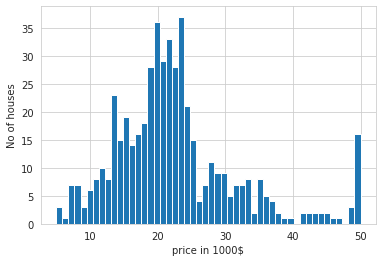

In [ ]:
plt.hist(boston_df['Price'],bins=50)

plt.xlabel('price in 1000$')
plt.ylabel('No of houses')

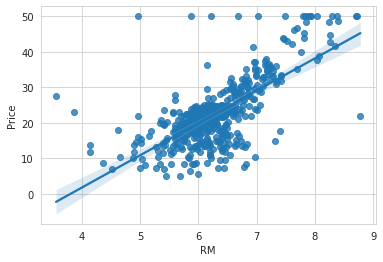

In [ ]:
sns.regplot(x=boston_df['RM'],y=boston_df['Price'],data=boston_df)

In [ ]:
x=boston_df['RM']

In [ ]:
x=np.vstack(boston_df['RM'])

In [ ]:
y=boston_df['Price']

In [ ]:
X=np.array([[value,float(1)] for value in x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [ ]:
X

array([[array([6.575]), 1.0],
       [array([6.421]), 1.0],
       [array([7.185]), 1.0],
       ...,
       [array([6.976]), 1.0],
       [array([6.794]), 1.0],
       [array([6.03]), 1.0]], dtype=object)

In [ ]:
X=X.astype(np.float64)

In [ ]:
m, b=np.linalg.lstsq(X,y, rcond=None)[0]

In [ ]:
m

9.102108981180313

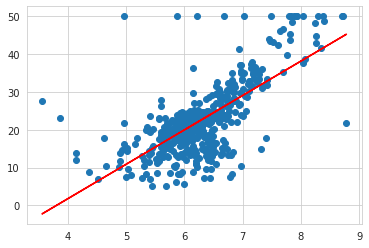

In [ ]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x=boston_df['RM']
plt.plot(x,m*x+b,'r',label='best fit line')

# Real estate Pricing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=Warning)

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Real estate.csv',index_col=0)

In [ ]:
df.index.name=None

In [ ]:
df.head(3)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3


In [ ]:
df.shape

(414, 7)

In [ ]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [ ]:
df.rename(columns={'X1 transaction date':'Transaction date','X2 house age':'House age','X3 distance to the nearest MRT station':'Distance to the nearest MRT station','X4 number of convenience stores':'Number of convenience stores','X5 latitude':'Latitude','X6 longitude':'Longitude','Y house price of unit area':'House price of unit area'},inplace=True)

In [ ]:
df['Transaction date'].head(5)

1    2012.917
2    2012.917
3    2013.583
4    2013.500
5    2012.833
Name: Transaction date, dtype: float64

In [ ]:
new=df['Transaction date'].astype(str).str.split('.',n=1,expand=True) #n: no. of splits, expand: split is in new column

In [ ]:
df['Transaction date']=new[0]

In [ ]:
df['Transaction date']

1      2012
2      2012
3      2013
4      2013
5      2012
       ... 
410    2013
411    2012
412    2013
413    2013
414    2013
Name: Transaction date, Length: 414, dtype: object

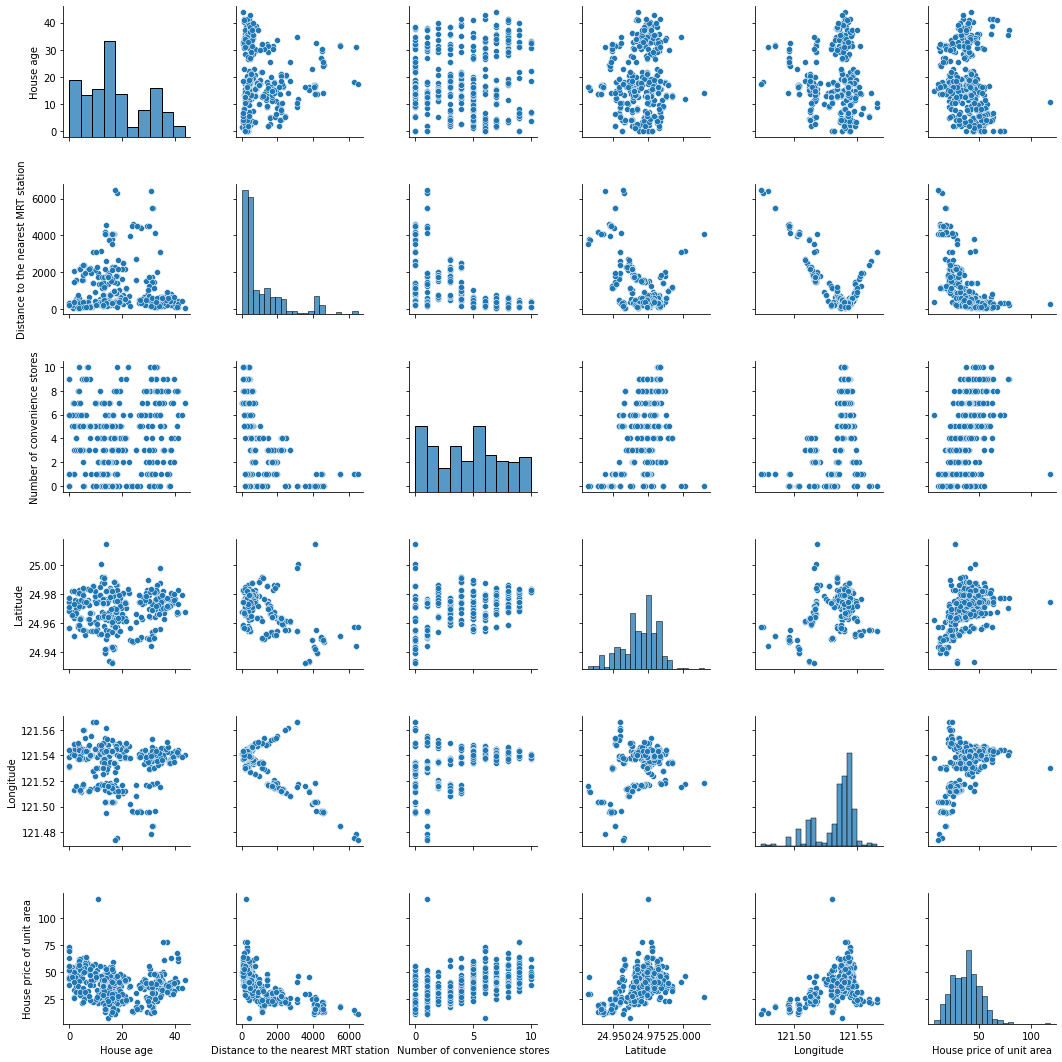

In [ ]:
sns.pairplot(data=df)

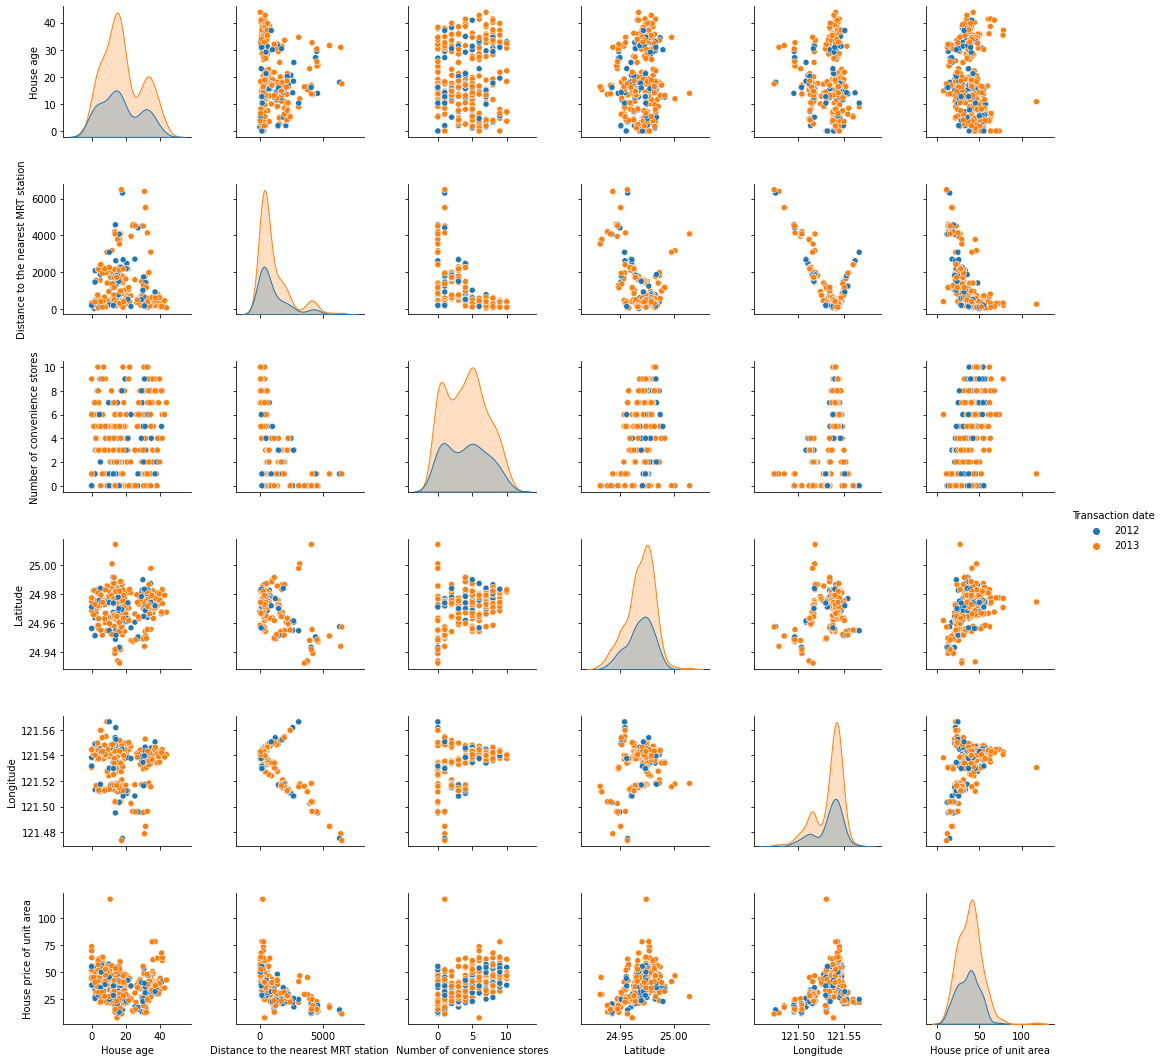

In [ ]:
sns.pairplot(df,hue='Transaction date')

1. We can see change in the mean price of unit area in 2012 & 2013. This is a small difference as mean is slightly moved towards right. but the no. of flats sold are significantly less in 2012
2. Distance to nearest MRT station is directly proportional to price
3. As the no. of convenient stores are increasing the base price of the unit area is also seen increasing
4. House age is indirectly proportional to price,but there are many data which are not affected by the house age those could be outliers but there could be some other reasons too

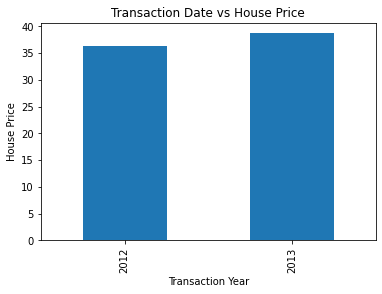

In [ ]:
data=df.copy()
data.groupby('Transaction date')['House price of unit area'].mean().plot.bar()
plt.title('Transaction Date vs House Price')
plt.ylabel('House Price')
plt.xlabel('Transaction Year')
plt.show()

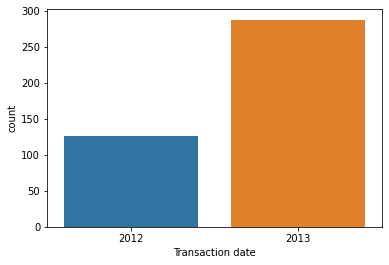

In [ ]:
plt.figure(figsize=(6,4))

sns.countplot(x='Transaction date', data=df)
plt.show()

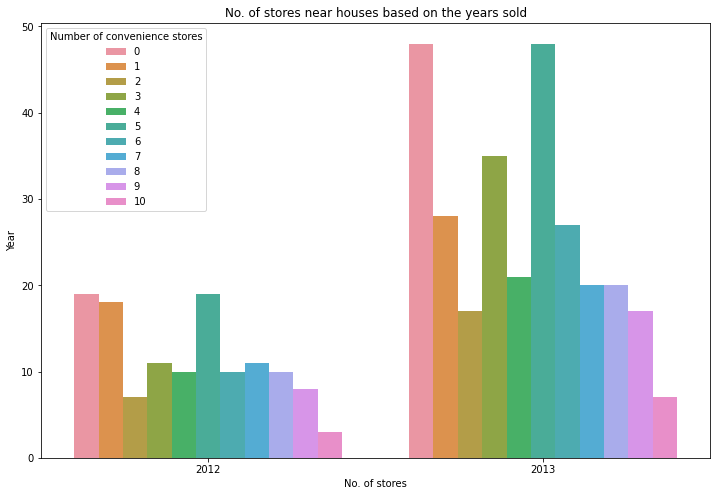

In [ ]:
plt.figure(figsize=(12,8))

sns.countplot(x='Transaction date', hue='Number of convenience stores', data=df)
plt.title('No. of stores near houses based on the years sold')
plt.xlabel('No. of stores')
plt.ylabel('Year')
plt.show()

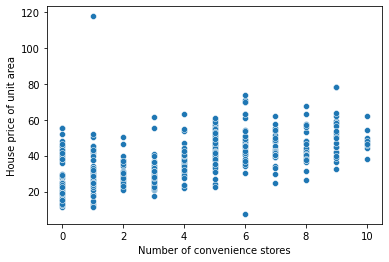

In [ ]:
sns.scatterplot(x='Number of convenience stores',y='House price of unit area',data=df)

In [ ]:
numeric_feature=list(df.select_dtypes(include=['int64','float']).keys())
numeric_feature

['House age',
 'Distance to the nearest MRT station',
 'Number of convenience stores',
 'Latitude',
 'Longitude',
 'House price of unit area']

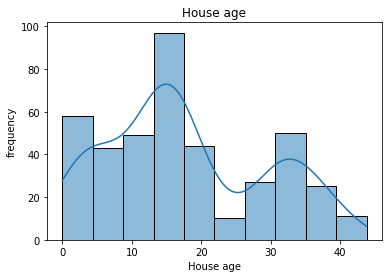

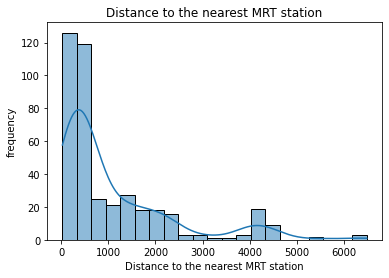

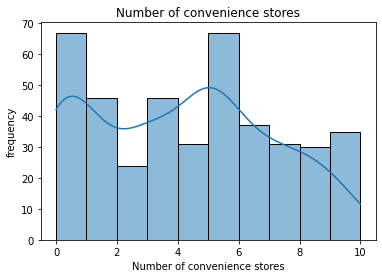

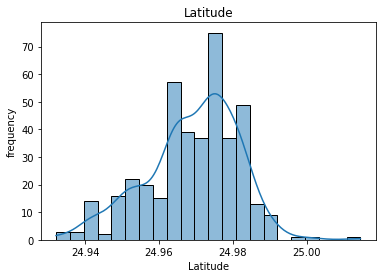

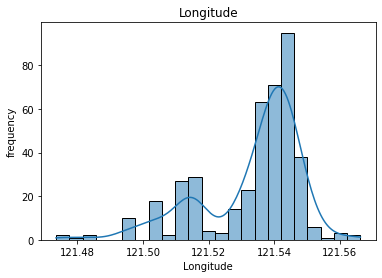

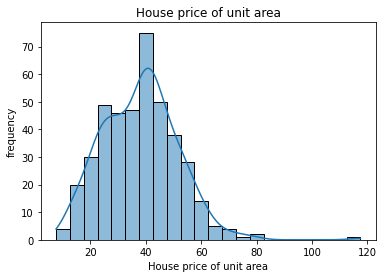

In [ ]:
for feature in numeric_feature:
  sns.histplot(data=df,x=feature,kde=True,palette='pastel')
  plt.title(feature)
  plt.xlabel(feature)
  plt.ylabel('frequency')
  plt.show()

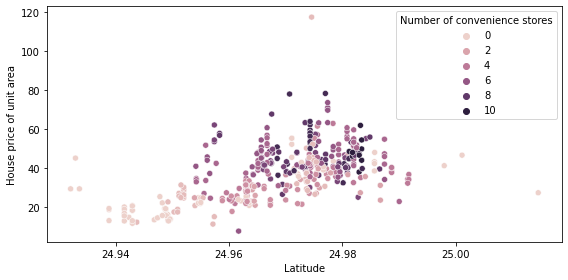

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Latitude',y='House price of unit area',hue='Number of convenience stores',data=df)
plt.tight_layout()

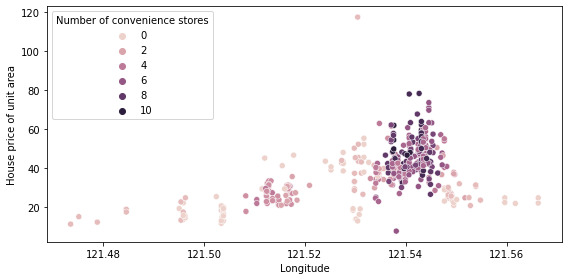

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Longitude',y='House price of unit area',hue='Number of convenience stores',data=df)
plt.tight_layout()

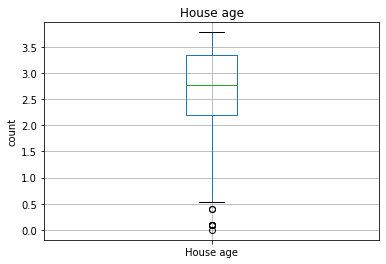

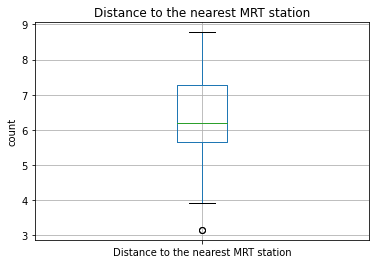

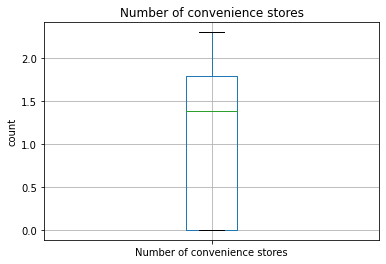

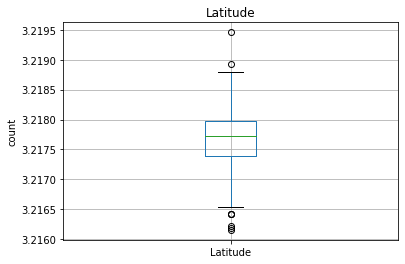

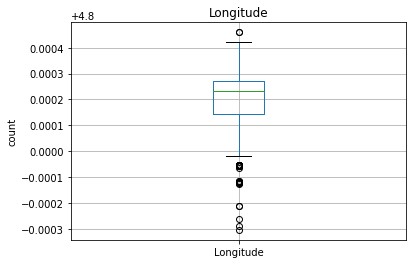

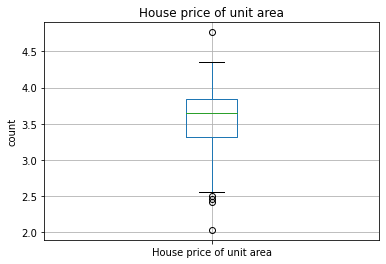

In [ ]:
#checking outliers

for feature in numeric_feature:
  data=df.copy()
  if data[feature].unique is 0:
    pass
  else:
    data[feature]=np.log(data[feature])
    data.boxplot(feature)
    plt.title(feature)
    plt.ylabel('count')
    plt.show()

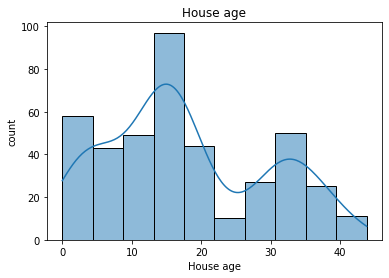

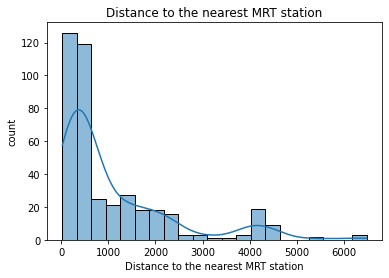

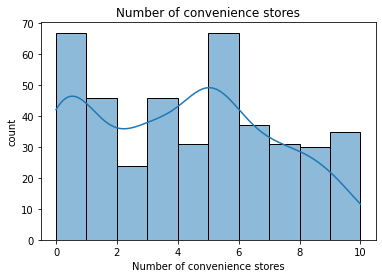

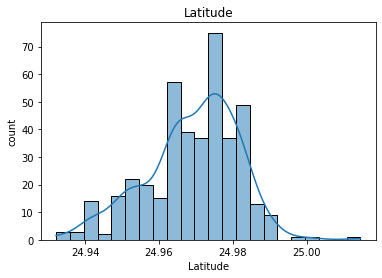

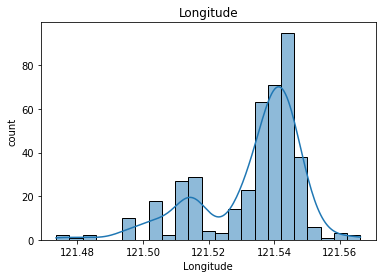

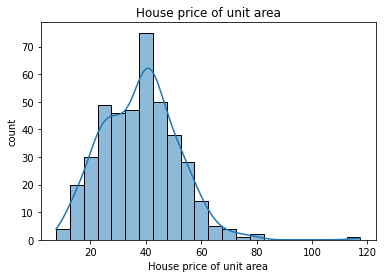

In [ ]:
for feature in numeric_feature:
  data=df.copy()
  if data[feature].unique is 0:
    pass
  else:
    data[feature]=np.log(data[feature])
    sns.histplot(data=df,x=feature,kde=True,palette='pastel')
    plt.title(feature)
    plt.ylabel('count')
    plt.show()

In [ ]:
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3=np.percentile(datacolumn,[25,75])
  IQR=Q3-Q1
  lower_range=Q1-(1.5* IQR)
  upper_range=Q3 +(1.5*IQR)
  return lower_range,upper_range

In [ ]:
#check percentage outlier in each feature

features=['House age','Distance to the nearest MRT station','Latitude']
for feature in features:
        data=df.copy()
        lowerbound,upperbound = outlier_treatment(data[feature])
        print(f"Feature is {feature} and {np.round(data[(data[feature] < lowerbound) | (data[feature] > upperbound)].shape[0]/ data.shape[0]*100,4)}% outliers")
        print("------------------------------")

Feature is House age and 0.0% outliers
------------------------------
Feature is Distance to the nearest MRT station and 8.9372% outliers
------------------------------
Feature is Latitude and 1.9324% outliers
------------------------------


In [ ]:
features=['House age','Distance to the nearest MRT station','Latitude']
for feature in features:
        lowerbound,upperbound = outlier_treatment(data[feature])
        df.drop(df[(df[feature]>upperbound)|(df[feature]< lowerbound)].index,inplace=True)
        print(f"Feature is {feature} and {np.round(data[(data[feature] < lowerbound) | (data[feature] > upperbound)].shape[0]/ data.shape[0]*100,4)}% outliers")
        print("------------------------------")

Feature is House age and 0.0% outliers
------------------------------
Feature is Distance to the nearest MRT station and 8.9372% outliers
------------------------------
Feature is Latitude and 1.9324% outliers
------------------------------


In [ ]:
statics=pd.get_dummies(df['Transaction date'],prefix_sep='_',prefix='year')
statics

,year_2012,year_2013
1,1,0
2,1,0
3,0,1
4,0,1
5,1,0
...,...,...
409,0,1
411,1,0
412,0,1
413,0,1


In [ ]:
df=pd.concat([df,statics],axis=1)

In [ ]:
df.drop('Transaction date',axis=1,inplace=True)

In [ ]:
df.head(3)

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area,year_2012,year_2013
1,32.0,84.87882,10,24.98298,121.54024,37.9,1,0
2,19.5,306.59470,9,24.98034,121.53951,42.2,1,0
3,13.3,561.98450,5,24.98746,121.54391,47.3,0,1


In [ ]:
df.shape

(376, 8)

In [ ]:
X=df.drop('House price of unit area',axis=1).copy()
y=df['House price of unit area']

In [ ]:
scaler=MinMaxScaler()

In [ ]:
col=X.columns
x=pd.DataFrame(scaler.fit_transform(X),columns=col)
x.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,year_2012,year_2013
0,0.730594,0.020085,1.0,0.694529,0.551207,1.0,0.0
1,0.445205,0.092499,0.9,0.640838,0.538621,1.0,0.0
2,0.303653,0.175911,0.5,0.785642,0.614483,0.0,1.0
3,0.303653,0.175911,0.5,0.785642,0.614483,0.0,1.0
4,0.114155,0.119925,0.5,0.621110,0.589310,1.0,0.0


In [ ]:
y

1      37.9
2      42.2
3      47.3
4      54.8
5      43.1
       ... 
409    28.1
411    50.0
412    40.6
413    52.5
414    63.9
Name: House price of unit area, Length: 376, dtype: float64

In [ ]:
y.reset_index(drop=bool,inplace=True)

In [ ]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
371    28.1
372    50.0
373    40.6
374    52.5
375    63.9
Name: House price of unit area, Length: 376, dtype: float64

In [ ]:
x_df=x.copy()
y_df=y.copy()
df_1=pd.concat([x_df,y_df],axis=1)
df_1.head()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,year_2012,year_2013,House price of unit area
0,0.730594,0.020085,1.0,0.694529,0.551207,1.0,0.0,37.9
1,0.445205,0.092499,0.9,0.640838,0.538621,1.0,0.0,42.2
2,0.303653,0.175911,0.5,0.785642,0.614483,0.0,1.0,47.3
3,0.303653,0.175911,0.5,0.785642,0.614483,0.0,1.0,54.8
4,0.114155,0.119925,0.5,0.621110,0.589310,1.0,0.0,43.1


In [ ]:
# Modelling
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,test_size=0.3)

In [ ]:
print("shape of X_train:",x_train.shape)
print("shape of X_test:",x_test.shape)
print("shape of y_train:",y_train.shape)
print("shape of y_test:",y_test.shape)

shape of X_train: (263, 7)
shape of X_test: (113, 7)
shape of y_train: (263,)
shape of y_test: (113,)


In [ ]:
# Adding a constant column to our X_train dataframe
x_train=sm.add_constant(x_train)

In [ ]:
x_train['const'].unique()

array([1.])

In [ ]:
model=sm.OLS(y_train.values.reshape(-1,1),x_train)
lm1=model.fit()

In [ ]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     55.38
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.52e-43
Time:                        18:02:33   Log-Likelihood:                -937.50
No. Observations:                 263   AIC:                             1889.
Df Residuals:                     256   BIC:                             1914.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
#adding constant to our test set
x_test=sm.add_constant(x_test)

lm3=sm.OLS(y_test.values.reshape(-1,1),x_test).fit()

In [ ]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     25.81
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           1.00e-18
Time:                        18:06:01   Log-Likelihood:                -386.54
No. Observations:                 113   AIC:                             787.1
Df Residuals:                     106   BIC:                             806.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  21.3299      2.569      8.303      0.000      16.237      26.423
House age                              -9.3529      2.788     -3.355      0.001     -14.880      -3.825
Distance to the nearest MRT station   -17.9876      4.038     -4.455      0.000     -25.993      -9.983
Number of convenience stores            8.7783      3.113      2.820      0.006       2.607      14.950
Latitude                               17.0500      4.030      4.231      0.000       9.060      25.040
Longitude                               6.3518      4.261      1.491      0.139      -2.096      14.799
year_2012                               8.8097      1.552      5.677      0.000       5.733      11.886
year_2013                              12.5201      1.447      8.651      0.000       9.651      15.390
==============================================================================
Omnibus:                       48.521   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.487
Skew:                           1.453   Prob(JB):                     6.42e-40
Kurtosis:                       8.467   Cond. No.                     4.71e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
y_pred=lm3.predict(x_test)

In [ ]:
def vif_scores(x):
  vif_data=pd.DataFrame()
  vif_data['Variables']=x.columns
  vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
  return vif_data


In [ ]:
print (vif_scores(x))

                             Variables        VIF
0                            House age   1.017163
1  Distance to the nearest MRT station   2.036505
2         Number of convenience stores   1.463940
3                             Latitude   1.221503
4                            Longitude   1.452175
5                            year_2012  11.242361
6                            year_2013  24.883485


In [ ]:
x.drop(columns=['year_2012','year_2013'],axis=1,inplace=True)
print(vif_scores(x))

                             Variables       VIF
0                            House age  3.122477
1  Distance to the nearest MRT station  1.669219
2         Number of convenience stores  4.483799
3                             Latitude  5.558865
4                            Longitude  5.152136


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)


In [ ]:
# Adding a constant column to our X_train dataframe
x_train = sm.add_constant(x_train)

# create a fitted model
model=sm.OLS(y_train.values.reshape(-1,1),x_train)
lm_2 = model.fit()

In [ ]:
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     59.76
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           4.00e-41
Time:                        18:41:29   Log-Likelihood:                -933.95
No. Observations:                 263   AIC:                             1880.
Df Residuals:                     257   BIC:                             1901.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# Adding a constant column to our X_train dataframe
x_test = sm.add_constant(x_test)

# create a fitted model
model=sm.OLS(y_test.values.reshape(-1,1),x_test)
lm_4 = model.fit()

In [ ]:
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     32.26
Date:                Sat, 29 Jan 2022   Prob (F-statistic):           6.32e-20
Time:                        19:07:04   Log-Likelihood:                -398.81
No. Observations:                 113   AIC:                             809.6
Df Residuals:                     107   BIC:                             826.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [ ]:
# Making predictions
y_pred = lm_4.predict(x_test)

In [ ]:
y_test.shape

(113,)

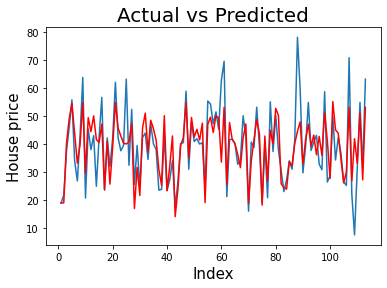

In [ ]:
# Actual vs Predicted graph as below
c=[i for i in range(1,114,1)]
fig=plt.figure()
#plotting actual
plt.plot(c,y_test)
#plotting predicted
plt.plot(c,y_pred,color='red')
#plot heading
plt.title('Actual vs Predicted',fontsize=20)
# X-label
plt.xlabel('Index',fontsize=15)
# Y-label
plt.ylabel('House price',fontsize=15)
#showing the plot
plt.show()

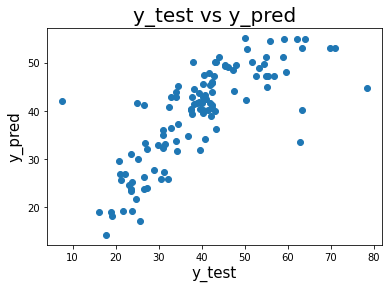

In [ ]:
# Plotting y_test and y_pred scatter plot to understand the spread.
fig = plt.figure()
#plotting scatter plot between actual and predicted
plt.scatter(y_test,y_pred)
# Plot heading 
plt.title('y_test vs y_pred',fontsize=20)
# X-label
plt.xlabel('y_test',fontsize=15)
# Y-label
plt.ylabel('y_pred',fontsize=15)
#show plot
plt.show()

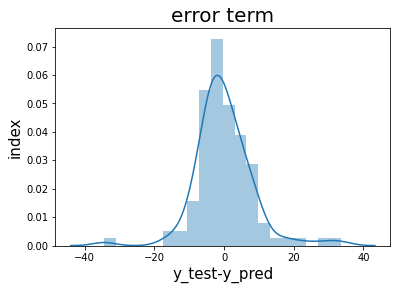

In [ ]:
# Plotting the error terms as dist plot to understand the distribution.
fig = plt.figure()
#plot distplot of error tem
sns.distplot(y_test.values-y_pred.values,bins=20)
# Plot heading 
plt.title('error term',fontsize=20)
# X-label
plt.xlabel('y_test-y_pred',fontsize=15)

# Y-label"
plt.ylabel('index',fontsize=15)

#show plot
plt.show()

In [ ]:
#calculate and print RMSE
mse=mean_squared_error(y_test,y_pred)
print("Root Mean Squared error(RMSE) is: ",np.sqrt(mse))

Root Mean Squared error(RMSE) is:  8.251094829292082


In [ ]:
#calculate and print MSE
print("Mean squared Error(MSE) is: ",mse)

Mean squared Error(MSE) is:  68.08056588197054


In [ ]:
#calculate and print MAE
print("Mean Absolute error(MAE) is: ",mean_absolute_error(y_test,y_pred))

Mean Absolute error(MAE) is:  5.688433727402153


In [ ]:
print(vif_scores(x))

                             Variables       VIF
0                            House age  3.122477
1  Distance to the nearest MRT station  1.669219
2         Number of convenience stores  4.483799
3                             Latitude  5.558865
4                            Longitude  5.152136


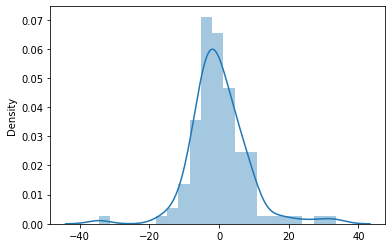

In [ ]:
residual=y_test.values-y_pred.values
sns.distplot(residual)

In [ ]:
np.mean(residual)

-3.5841536228606824e-15

In [ ]:
#fitting in  linear Modrl
model=LinearRegression(normalize=True)
model.fit(x_train,y_train)
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [ ]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [ ]:
r2_train,r2_test


(0.5375868746830985, 0.5868302468560308)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

8.398397231444703

# Car Price

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=Warning)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/datasets/CarPrice_Assignment.csv')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.shape

(205, 26)

In [ ]:
df.drop('car_ID',axis=1,inplace=True)

In [ ]:
Counter(df['CarName'])

Counter({'Nissan versa': 1,
         'alfa-romero Quadrifoglio': 1,
         'alfa-romero giulia': 1,
         'alfa-romero stelvio': 1,
         'audi 100 ls': 1,
         'audi 100ls': 2,
         'audi 4000': 1,
         'audi 5000': 1,
         'audi 5000s (diesel)': 1,
         'audi fox': 1,
         'bmw 320i': 2,
         'bmw x1': 1,
         'bmw x3': 2,
         'bmw x4': 1,
         'bmw x5': 1,
         'bmw z4': 1,
         'buick century': 1,
         'buick century luxus (sw)': 1,
         'buick century special': 1,
         'buick electra 225 custom': 1,
         'buick opel isuzu deluxe': 1,
         'buick regal sport coupe (turbo)': 1,
         'buick skyhawk': 1,
         'buick skylark': 1,
         'chevrolet impala': 1,
         'chevrolet monte carlo': 1,
         'chevrolet vega 2300': 1,
         'dodge challenger se': 1,
         'dodge colt (sw)': 1,
         'dodge colt hardtop': 1,
         'dodge coronet custom': 1,
         'dodge coronet custom (sw)':

In [ ]:
df['brand_name']=df['CarName'].apply(lambda x: x.split(' ')[0])

In [ ]:
pd.unique(df['brand_name'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
replace_dict=dict([('maxda','mazda'),('Nissan','nissan'),('porcshce','porsche'),('toyouta','toyota'),('vokswagen','volkswagen')])

In [ ]:
for k,v in replace_dict.items():
  df['brand_name'].replace(k,v,inplace=True)

In [ ]:
pd.unique(df['brand_name'])

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
for col in df.columns:
  if df[col].dtype=="O":
    print('{}:{}'.format(col,len(pd.unique(df[col]))))

CarName:147
fueltype:2
aspiration:2
doornumber:2
carbody:5
drivewheel:3
enginelocation:2
enginetype:7
cylindernumber:7
fuelsystem:8
brand_name:23


In [ ]:
Counter(df['fueltype'])

Counter({'diesel': 20, 'gas': 185})

In [ ]:
Counter(df['aspiration'])

Counter({'std': 168, 'turbo': 37})

In [ ]:
Counter(df['doornumber'])

Counter({'four': 115, 'two': 90})

In [ ]:
Counter(df['carbody'])

Counter({'convertible': 6,
         'hardtop': 8,
         'hatchback': 70,
         'sedan': 96,
         'wagon': 25})

In [ ]:
Counter(df['drivewheel'])

Counter({'4wd': 9, 'fwd': 120, 'rwd': 76})

In [ ]:
df['drivewheel'].replace('4wd','fwd',inplace=True)

In [ ]:
Counter(df['enginelocation'])

Counter({'front': 202, 'rear': 3})

In [ ]:
Counter(df['enginetype'])

Counter({'dohc': 12,
         'dohcv': 1,
         'l': 12,
         'ohc': 148,
         'ohcf': 15,
         'ohcv': 13,
         'rotor': 4})

In [ ]:
replace_dict=dict([('dohcv','dohc'),('ohcf','ohc'),('ohcv','ohc')])
for k,v in replace_dict.items():
  df['enginetype'].replace(k,v,inplace=True)

In [ ]:
Counter(df['cylindernumber'])

Counter({'eight': 5,
         'five': 11,
         'four': 159,
         'six': 24,
         'three': 1,
         'twelve': 1,
         'two': 4})

In [ ]:
Counter(df['fuelsystem'])

Counter({'1bbl': 11, '2bbl': 66, '4bbl': 3, 'idi': 20, 'mfi': 95, 'spfi': 10})

In [ ]:
replace_dict=dict([('mpfi','mfi'),('spdi','spfi')])
for k,v in replace_dict.items():
  df['fuelsystem'].replace(k,v,inplace=True)

In [ ]:
Counter(df['symboling'])

Counter({-2: 3, -1: 22, 0: 67, 1: 54, 2: 32, 3: 27})

In [ ]:
del df['CarName']

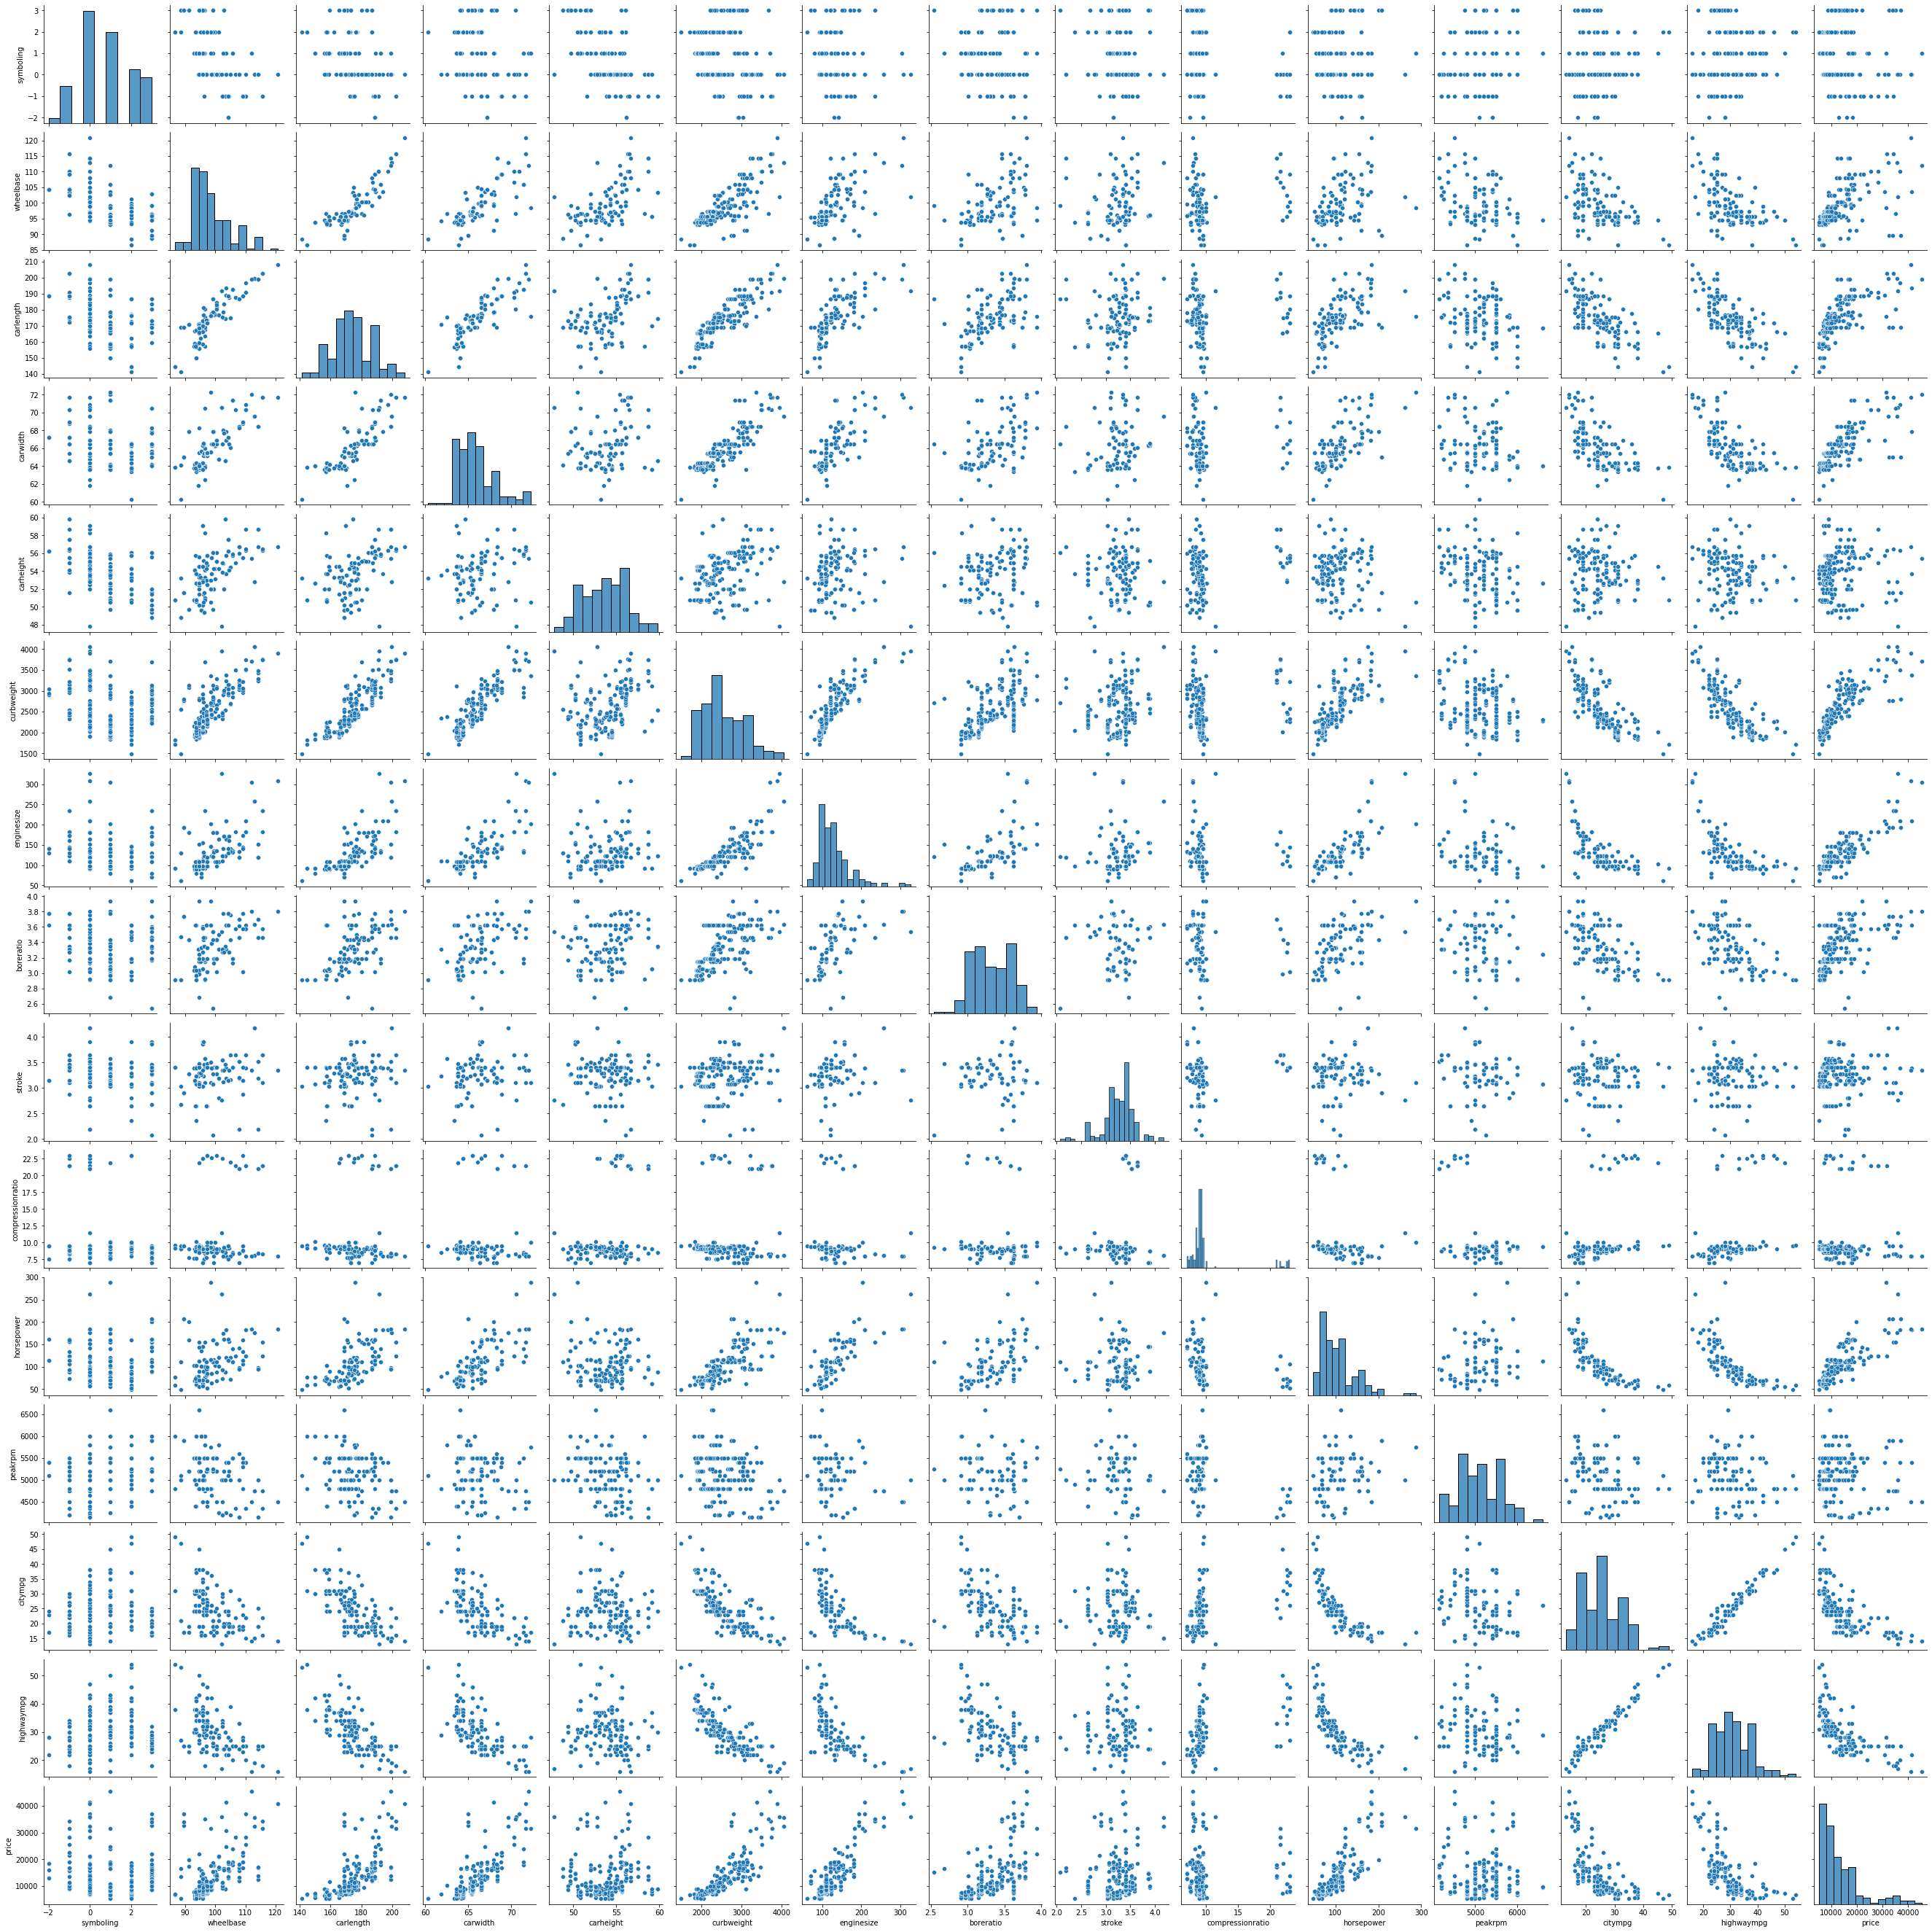

In [ ]:
sns.pairplot(df)

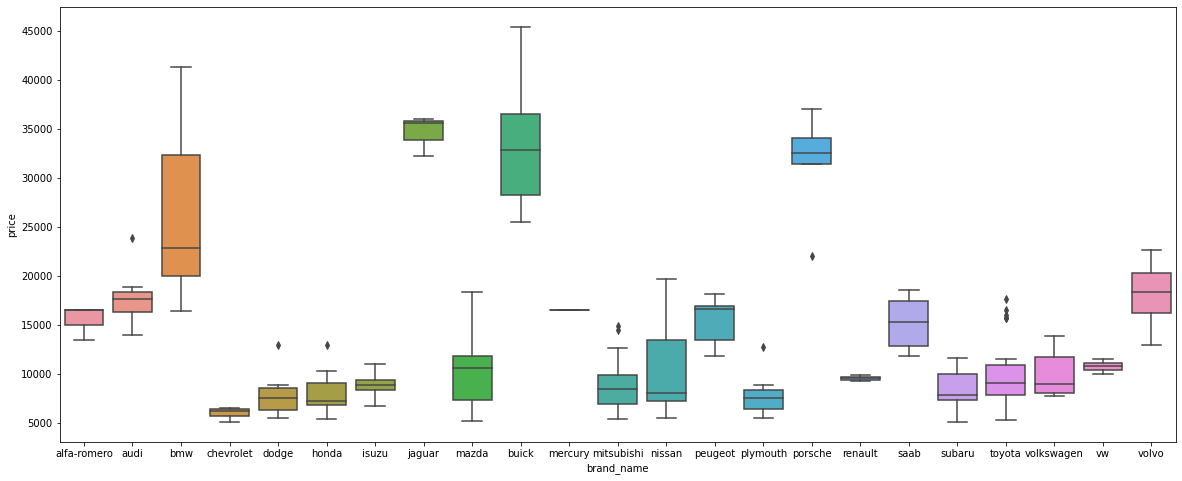

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(df['brand_name'],df['price'])
plt.show()

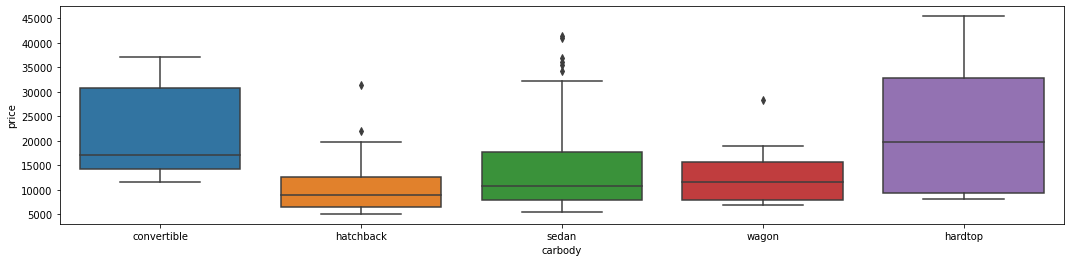

In [ ]:
plt.figure(figsize=(18,4))
sns.boxplot(df['carbody'],df['price'])
plt.show()

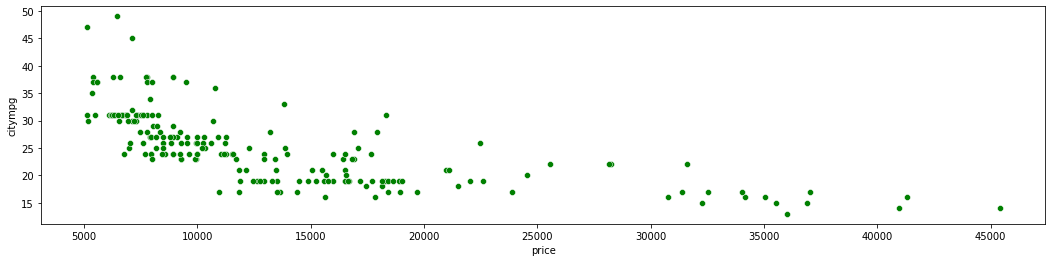

In [ ]:
plt.figure(figsize=(18,4))
sns.scatterplot(df['price'],df['citympg'],color='green',marker='o')
plt.show()

In [ ]:
numeric_features=list(df.select_dtypes(include=['int64','float64']))

In [ ]:
numeric_features

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [ ]:
dummy=pd.DataFrame()
for col in df.columns:
  if df[col].dtypes=='O':
    temp=pd.get_dummies(df[col],drop_first=True, prefix=col)
    dummy=pd.concat([dummy,temp],axis=1)

In [ ]:
len(dummy)

205

In [ ]:
df_numeric=pd.DataFrame()
for col in df.columns:
  if df[col].dtypes!='O':
    df_numeric=pd.concat([df_numeric,df[[col]]],axis=1)

In [ ]:
df_final=pd.concat([dummy,df_numeric],axis=1)

In [ ]:
df_final.shape

(205, 60)

In [ ]:
df_final.columns

Index(['fueltype_gas', 'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohc',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_spfi',
       'brand_name_audi', 'brand_name_bmw', 'brand_name_buick',
       'brand_name_chevrolet', 'brand_name_dodge', 'brand_name_honda',
       'brand_name_isuzu', 'brand_name_jaguar', 'brand_name_mazda',
       'brand_name_mercury', 'brand_name_mitsubishi', 'brand_name_nissan',
       'brand_name_peugeot', 'brand_name_plymouth', 'brand_name_porsche',
       'brand_name_renault', 'brand_name_saab', 'brand_name_subaru',
       'brand_name_toyota', 'brand_name_volkswagen', 'brand_name_volvo',
  

In [ ]:
x=df_final.drop('price',axis=1)
y=df_final['price']

In [ ]:
x

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,enginetype_l,enginetype_ohc,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_spfi,brand_name_audi,brand_name_bmw,brand_name_buick,brand_name_chevrolet,brand_name_dodge,brand_name_honda,brand_name_isuzu,brand_name_jaguar,brand_name_mazda,brand_name_mercury,brand_name_mitsubishi,brand_name_nissan,brand_name_peugeot,brand_name_plymouth,brand_name_porsche,brand_name_renault,brand_name_saab,brand_name_subaru,brand_name_toyota,brand_name_volkswagen,brand_name_volvo,brand_name_vw,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28
201,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25
202,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23
203,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
sc=Normalizer()

In [ ]:
sc=Normalizer()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train[0]

array([1.61572130e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.61572130e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.61572130e-04, 0.00000000e+00,
       1.61572130e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.61572130e-04, 0.00000000e+00, 1.61572130e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.23144260e-04, 1.60602697e-02, 2.85336381e-02,
       1.07283894e-02, 8.77336665e-03, 4.56279695e-01, 2.19738097e-02,
       5.15415094e-04, 5.49345241e-04, 1.29257704e-03, 1.85807949e-02,
      

In [ ]:
model=LinearRegression(normalize=True)

In [ ]:
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)


In [ ]:
r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [ ]:
r2_train

0.9721352632346837

In [ ]:
r2_test

0.8544624853542653

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

3356.6328915419545

In [ ]:
model.intercept_

-43279.04422891767

In [ ]:
for col,coef in zip(x.columns,model.coef_):
  print('{}:{}'.format(col,coef))

In [ ]:
x_train=sm.add_constant(x_train)
model=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     70.42
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           8.17e-65
Time:                        07:54:28   Log-Likelihood:                -1407.8
No. Observations:                 164   AIC:                             2926.
Df Residuals:                     109   BIC:                             3096.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.328e+04   5.15e+04     -0.841      0.402   -1.45e+05    5.87e+04
x1         -3.374e+08   9.13e+07     -3.696      0.000   -5.18e+08   -1.56e+08
x2           1.04e+07   4.62e+06      2.252      0.026    1.25e+06    1.96e+07
x3           -6.7e+06   3.16e+06     -2.117      0.037    -1.3e+07   -4.27e+05
x4         -2.591e+07   7.34e+06     -3.533      0.001   -4.05e+07   -1.14e+07
x5         -2.559e+07   6.98e+06     -3.666      0.000   -3.94e+07   -1.18e+07
x6         -2.341e+07   7.43e+06     -3.150      0.002   -3.81e+07   -8.68e+06
x7         -2.647e+07   8.14e+06     -3.253      0.002   -4.26e+07   -1.03e+07
x8          7.938e+06   4.65e+06      1.707      0.091   -1.28e+06    1.72e+07
x9          6.372e+07   7.39e+06      8.624      0.000    4.91e+07    7.84e+07
x10        -2.096e+07   6.18e+06     -3.391      0.001   -3.32e+07   -8.71e+06
x11        -2.266e+06   6.06e+06     -0.374      0.709   -1.43e+07    9.75e+06
x12          1.38e+07   1.27e+07      1.087      0.280   -1.14e+07     3.9e+07
x13        -1.937e+07   1.28e+07     -1.515      0.133   -4.47e+07    5.96e+06
x14        -9.224e+06   1.76e+07     -0.525      0.601   -4.41e+07    2.56e+07
x15        -1.716e+07   1.53e+07     -1.125      0.263   -4.74e+07    1.31e+07
x16         8.694e-06   5.54e-06      1.570      0.119   -2.28e-06    1.97e-05
x17         1.521e+07   3.11e+07      0.489      0.626   -4.64e+07    7.69e+07
x18          1.38e+07   1.27e+07      1.087      0.280   -1.14e+07     3.9e+07
x19         1.585e+07   8.49e+06      1.866      0.065   -9.83e+05    3.27e+07
x20        -3.276e+06   1.54e+07     -0.212      0.832   -3.39e+07    2.73e+07
x21        -2.562e+08   1.01e+08     -2.539      0.013   -4.56e+08   -5.62e+07
x22         8.775e+06   9.03e+06      0.972      0.333   -9.12e+06    2.67e+07
x23         6.059e+06   1.01e+07      0.602      0.548   -1.39e+07     2.6e+07
x24         1.683e+06   1.28e+07      0.132      0.895   -2.36e+07     2.7e+07
x25          3.98e+07   1.02e+07      3.893      0.000    1.95e+07    6.01e+07
x26         1.409e+07   1.52e+07      0.928      0.356    -1.6e+07    4.42e+07
x27        -2.708e+07    1.2e+07     -2.265      0.026   -5.08e+07   -3.38e+06
x28        -3.332e+07   1.01e+07     -3.307      0.001   -5.33e+07   -1.34e+07
x29        -1.276e+07    1.2e+07     -1.066      0.289   -3.65e+07     1.1e+07
x30        -1.478e+07    1.1e+07     -1.347      0.181   -3.65e+07    6.96e+06
x31         1.484e+07   1.73e+07      0.856      0.394   -1.95e+07    4.92e+07
x32        -1.381e+07   8.97e+06     -1.540      0.127   -3.16e+07    3.97e+06
x33        -1.468e+07   1.48e+07     -0.993      0.323    -4.4e+07    1.46e+07
x34        -3.268e+07      1e+07     -3.264      0.001   -5.25e+07   -1.28e+07
x35        -1.319e+07   9.11e+06     -1.448      0.150   -3.12e+07    4.86e+06
x3

In [ ]:
#vif scores
def vif_score(x):
  vif_data=pd.DataFrame()
  vif_data['Variables']=x.columns
  vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
  return vif_data

In [ ]:
print (vif_score(x))

                Variables           VIF
0            fueltype_gas  13313.118330
1        aspiration_turbo      6.065659
2          doornumber_two      3.831890
3         carbody_hardtop      3.493085
4       carbody_hatchback     18.216619
5           carbody_sedan     24.307941
6           carbody_wagon     12.184400
7          drivewheel_rwd      8.360929
8     enginelocation_rear      5.934187
9          enginetype_ohc      7.346425
10    cylindernumber_five      6.821783
11    cylindernumber_four     21.575962
12     cylindernumber_six     12.401598
13  cylindernumber_twelve      6.257914
14        fuelsystem_2bbl     31.394637
15        fuelsystem_4bbl      5.395121
16         fuelsystem_idi   1790.823934
17         fuelsystem_mfi     39.028712
18        fuelsystem_spfi      9.466463
19        brand_name_audi      9.555844
20         brand_name_bmw      7.870982
21       brand_name_buick     13.343522
22   brand_name_chevrolet      4.155961
23       brand_name_dodge      8.226579


In [ ]:
x.drop(columns=['cylindernumber_two','enginetype_rotor','cylindernumber_three','enginetype_l'],axis=1,inplace=True)

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

In [ ]:
sc=Normalizer()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
model=LinearRegression(normalize=True)

In [ ]:
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [ ]:

r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)

In [ ]:
r2_train,r2_test

(0.9718334671650363, 0.8601828342641461)

In [ ]:
x_train=sm.add_constant(x_train)

In [ ]:

model=sm.add_constant(x_train)

In [ ]:

model=sm.OLS(y_train,x_train).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     71.61
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           1.71e-65
Time:                        08:17:41   Log-Likelihood:                -1408.6
No. Observations:                 164   AIC:                             2925.
Df Residuals:                     110   BIC:                             3093.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.839e+04   5.13e+04     -0.748      0.456    -1.4e+05    6.33e+04
x1         -3.321e+08   9.12e+07     -3.640      0.000   -5.13e+08   -1.51e+08
x2          9.497e+06   4.55e+06      2.089      0.039    4.89e+05    1.85e+07
x3         -6.844e+06   3.16e+06     -2.163      0.033   -1.31e+07   -5.73e+05
x4         -2.504e+07    7.3e+06     -3.431      0.001   -3.95e+07   -1.06e+07
x5          -2.45e+07   6.91e+06     -3.544      0.001   -3.82e+07   -1.08e+07
x6         -2.261e+07    7.4e+06     -3.055      0.003   -3.73e+07   -7.95e+06
x7         -2.581e+07   8.12e+06     -3.178      0.002   -4.19e+07   -9.72e+06
x8          7.967e+06   4.65e+06      1.712      0.090   -1.25e+06    1.72e+07
x9          6.289e+07   7.35e+06      8.551      0.000    4.83e+07    7.75e+07
x10        -2.494e+06   6.06e+06     -0.411      0.682   -1.45e+07    9.53e+06
x11         -2.94e+07   8.85e+06     -3.323      0.001   -4.69e+07   -1.19e+07
x12        -2.509e+07    9.8e+06     -2.558      0.012   -4.45e+07   -5.65e+06
x13        -3.017e+07   9.45e+06     -3.193      0.002   -4.89e+07   -1.14e+07
x14         7.443e+06   3.03e+07      0.246      0.806   -5.26e+07    6.75e+07
x15         1.504e+07   8.47e+06      1.776      0.078   -1.74e+06    3.18e+07
x16          1.28e+06   1.49e+07      0.086      0.932   -2.82e+07    3.08e+07
x17        -2.566e+08   1.01e+08     -2.541      0.012   -4.57e+08   -5.65e+07
x18         8.061e+06   9.01e+06      0.894      0.373    -9.8e+06    2.59e+07
x19         5.564e+06   1.01e+07      0.553      0.581   -1.44e+07    2.55e+07
x20        -2.588e+06   1.21e+07     -0.213      0.832   -2.66e+07    2.15e+07
x21         3.902e+07   1.02e+07      3.824      0.000    1.88e+07    5.92e+07
x22         8.979e+06   1.45e+07      0.621      0.536   -1.97e+07    3.76e+07
x23        -2.678e+07    1.2e+07     -2.238      0.027   -5.05e+07   -3.06e+06
x24        -3.294e+07   1.01e+07     -3.269      0.001   -5.29e+07    -1.3e+07
x25        -1.285e+07    1.2e+07     -1.072      0.286   -3.66e+07    1.09e+07
x26        -1.542e+07    1.1e+07     -1.407      0.162   -3.71e+07    6.31e+06
x27         1.868e+07    1.7e+07      1.100      0.274    -1.5e+07    5.23e+07
x28        -1.373e+07   8.98e+06     -1.530      0.129   -3.15e+07    4.06e+06
x29        -1.751e+07   1.46e+07     -1.202      0.232   -4.64e+07    1.14e+07
x30        -3.252e+07      1e+07     -3.246      0.002   -5.24e+07   -1.27e+07
x31        -1.347e+07   9.11e+06     -1.479      0.142   -3.15e+07    4.58e+06
x32        -4.319e+07   1.23e+07     -3.507      0.001   -6.76e+07   -1.88e+07
x33        -3.207e+07    9.9e+06     -3.240      0.002   -5.17e+07   -1.25e+07
x34         6.289e+07   7.35e+06      8.551      0.000    4.83e+07    7.75e+07
x35        -1.568e-06    5.5e-07     -2.849      0.005   -2.66e-06   -4.77e-07
x3

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
estimator = LinearRegression()

In [ ]:
selector=RFE(estimator,n_features_to_select=30,step=1)
selector=selector.fit(x,y)

In [ ]:
x_train_rfe = x[list(x.columns[selector.get_support()])] 

In [ ]:
model = sm.OLS(y,x_train_rfe).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     103.2
Date:                Mon, 31 Jan 2022   Prob (F-statistic):           8.68e-95
Time:                        08:45:37   Log-Likelihood:                -1835.6
No. Observations:                 205   AIC:                             3731.
Df Residuals:                     175   BIC:                             3831.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_gas          -6.631e+04   9109.465     -7.280      0.000   -8.43e+04   -4.83e+04
carbody_hardtop       -3031.6415   1121.586     -2.703      0.008   -5245.218    -818.065
carbody_hatchback     -3941.0502    959.011     -4.109      0.000   -5833.767   -2048.334
carbody_sedan         -3259.9701    945.809     -3.447      0.001   -5126.630   -1393.310
carbody_wagon         -3331.4586   1013.696     -3.286      0.001   -5332.102   -1330.815
drivewheel_rwd         2524.7744    548.320      4.605      0.000    1442.603    3606.945
enginelocation_rear    1.295e+04   2364.801      5.476      0.000    8282.959    1.76e+04
cylindernumber_five   -7773.7734   1246.668     -6.236      0.000   -1.02e+04   -5313.333
cylindernumber_four   -5384.5060   1138.678     -4.729      0.000   -7631.815   -3137.197
cylindernumber_six    -2092.0683   1277.666     -1.637      0.103   -4613.686     429.550
cylindernumber_twelve  4285.7211   2962.129      1.447      0.150   -1560.373    1.01e+04
fuelsystem_4bbl       -4024.2673   1694.581     -2.375      0.019   -7368.713    -679.822
fuelsystem_idi        -4.352e+04   1.15e+04     -3.800      0.000   -6.61e+04   -2.09e+04
brand_name_audi        3934.6447   1383.760      2.843      0.005    1203.639    6665.651
brand_name_bmw         8430.4205    899.585      9.371      0.000    6654.989    1.02e+04
brand_name_buick       8597.6439   1438.940      5.975      0.000    5757.734    1.14e+04
brand_name_jaguar      9802.8956   1580.632      6.202      0.000    6683.340    1.29e+04
brand_name_mazda      -1096.8669    617.076     -1.778      0.077   -2314.735     121.002
brand_name_mercury    -1524.9040   2122.419     -0.718      0.473   -5713.737    2663.929
brand_name_mitsubishi -1838.0086    694.674     -2.646      0.009   -3209.026    -466.991
brand_name_peugeot    -3923.6078    900.200     -4.359      0.000   -5700.254   -2146.961
brand_name_plymouth    -953.6508    825.870     -1.155      0.250   -2583.598     676.296
brand_name_porsche     5358.0694   1757.366      3.049      0.003    1889.710    8826.429
brand_name_renault    -2614.1119   1504.170     -1.738      0.084   -5582.761     354.538
brand_name_saab        3964.7292    923.359      4.294      0.000    2142.377    5787.081
brand_name_subaru     -1399.6534    791.483     -1.768      0.079   -2961.734     162.427
brand_name_toyota     -1095.5358    447.285     -2.449      0.015   -1978.304    -212.768
carwidth               1491.6484    144.134     10.349      0.000    1207.184    1776.113
boreratio               822.9593   1048.487      0.785      0.434   -1246.347    2892.266
compressionratio      -1675.1092    294.933     -5.680      0.000   -2257.193   -1093.025
==============================================================================
Omnibus:                       68.

In [ ]:
print (vif_score(x_train_rfe))

                Variables          VIF
0            fueltype_gas  3734.921534
1         carbody_hardtop     2.352836
2       carbody_hatchback    10.314529
3           carbody_sedan    11.108993
4           carbody_wagon     5.487801
5          drivewheel_rwd     3.498175
6     enginelocation_rear     4.021907
7     cylindernumber_five     3.936103
8     cylindernumber_four    11.254521
9      cylindernumber_six     8.415790
10  cylindernumber_twelve     2.124262
11        fuelsystem_4bbl     2.065225
12         fuelsystem_idi   638.361375
13        brand_name_audi     3.149597
14         brand_name_bmw     1.513598
15       brand_name_buick     3.872681
16      brand_name_jaguar     1.796820
17       brand_name_mazda     1.444289
18     brand_name_mercury     1.090593
19  brand_name_mitsubishi     1.429476
20     brand_name_peugeot     2.052310
21    brand_name_plymouth     1.121906
22     brand_name_porsche     3.665175
23     brand_name_renault     1.090160
24        brand_name_saab

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(x_train_rfe,y,test_size=0.2,random_state=0)

In [ ]:
X_train

,fueltype_gas,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_rwd,enginelocation_rear,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,fuelsystem_4bbl,fuelsystem_idi,brand_name_audi,brand_name_bmw,brand_name_buick,brand_name_jaguar,brand_name_mazda,brand_name_mercury,brand_name_mitsubishi,brand_name_peugeot,brand_name_plymouth,brand_name_porsche,brand_name_renault,brand_name_saab,brand_name_subaru,brand_name_toyota,carwidth,boreratio,compressionratio
4,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,66.4,3.19,8.0
71,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,71.7,3.46,8.3
134,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,66.5,2.54,9.3
145,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,65.4,3.62,7.7
122,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,63.8,2.97,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,70.3,3.58,21.5
192,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66.9,3.01,23.0
117,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,68.3,3.61,7.0
47,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,69.6,3.63,8.1
